<a href="https://colab.research.google.com/github/norannali/EmployeeLeaveOrNot/blob/main/EmployeeLeaveOrNot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [2]:
data=pd.read_csv('/content/Employee.csv')
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [4]:
data.dtypes

,0
Education,object
JoiningYear,int64
City,object
PaymentTier,int64
Age,int64
Gender,object
EverBenched,object
ExperienceInCurrentDomain,int64
LeaveOrNot,int64


In [5]:
data.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [6]:
data.shape

(4653, 9)

In [7]:
data.duplicated().sum()

np.int64(1889)

**Types of duplicated**
1. **Fully Duplicated Rows**
* Every column in the row is the same as another row.**(drop_duplicates())**
2. **Partially Duplicated Rows**
* Some columns are duplicated, while others may differ slightly**(drop_duplicates(subset=[...]))**
3. **Duplicate Values in a Single Column**
* A specific column has the same value repeated.



In [8]:
# keep=False: Ensures that all occurrences of duplicates are shown, not just one
# This helps in analyzing duplicate values before deciding whether to remove or handle them
data[data.duplicated(keep=False)].head(20)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
8,Bachelors,2016,Pune,3,23,Male,No,1,0
10,Masters,2012,Bangalore,3,27,Male,No,5,1
14,Bachelors,2012,Bangalore,3,37,Male,No,4,0
21,Masters,2017,New Delhi,2,28,Male,No,4,0
22,Bachelors,2017,New Delhi,2,36,Male,No,3,0
23,Bachelors,2015,Bangalore,3,27,Male,Yes,5,0
24,Bachelors,2017,Bangalore,3,29,Male,No,4,0
26,Bachelors,2016,Bangalore,3,37,Male,No,2,0


In [9]:
data[data.duplicated(subset=['Education', 'City', 'Gender', 'PaymentTier', 'EverBenched'], keep=False)]

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [10]:
print("Num of fully duplicated : ", data.duplicated().sum())
print("Num of partially duplicated : ", data[data.duplicated(subset=['Education', 'City', 'Gender', 'PaymentTier', 'EverBenched'], keep=False)].shape[0])

data_cleaned = data.drop_duplicates()
print("data after drop duplication", data_cleaned.shape)


Num of fully duplicated :  1889
Num of partially duplicated :  4648
data after drop duplication (2764, 9)


In [11]:
data.isnull().sum()

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


In [12]:
for col in data.columns:
  print(col,':',data[col].nunique())

Education : 3
JoiningYear : 7
City : 3
PaymentTier : 3
Age : 20
Gender : 2
EverBenched : 2
ExperienceInCurrentDomain : 8
LeaveOrNot : 2


In [13]:
for col in data.columns:
  print(col,':',data[col].unique())

Education : ['Bachelors' 'Masters' 'PHD']
JoiningYear : [2017 2013 2014 2016 2015 2012 2018]
City : ['Bangalore' 'Pune' 'New Delhi']
PaymentTier : [3 1 2]
Age : [34 28 38 27 24 22 23 37 32 39 29 30 36 31 25 26 40 35 33 41]
Gender : ['Male' 'Female']
EverBenched : ['No' 'Yes']
ExperienceInCurrentDomain : [0 3 2 5 1 4 7 6]
LeaveOrNot : [0 1]


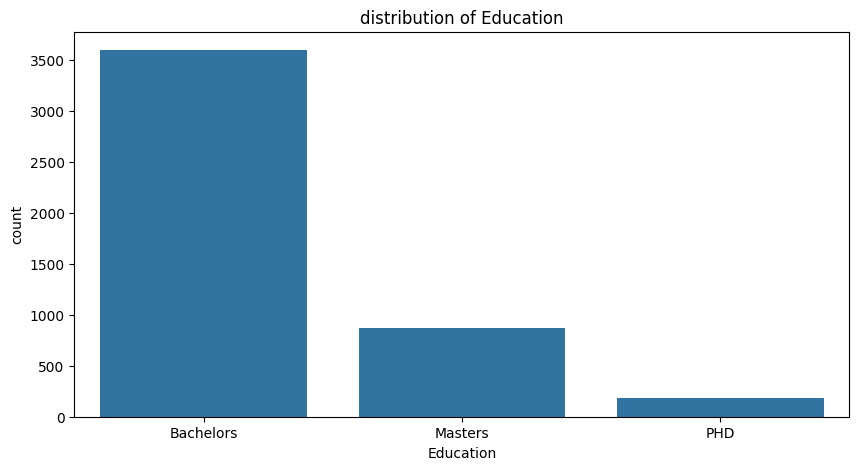

In [14]:
#distribution of education
plt.figure(figsize=(10,5))
sns.barplot(x=data['Education'].value_counts().index,y=data['Education'].value_counts())
plt.title('distribution of Education')
plt.ylabel('count')
plt.show()

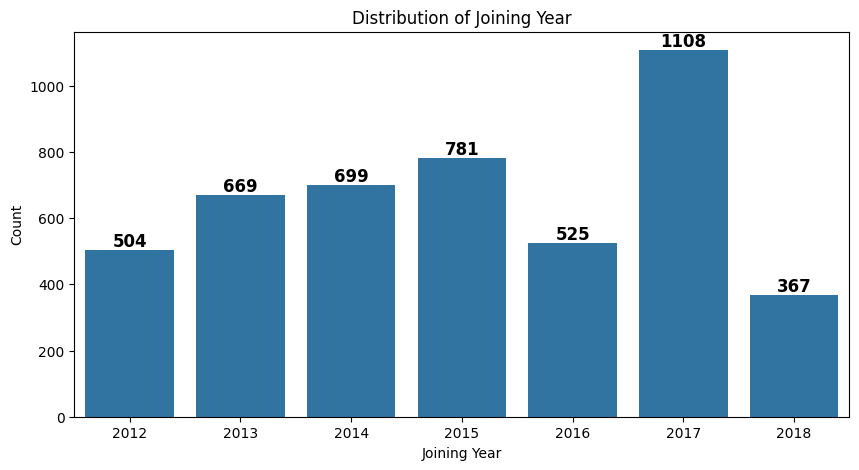

In [15]:
# Distribution of Joining Year with value labels
plt.figure(figsize=(10,5))
ax = sns.barplot(x=data['JoiningYear'].value_counts().index, y=data['JoiningYear'].value_counts())


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Distribution of Joining Year')
plt.ylabel('Count')
plt.xlabel('Joining Year')
plt.show()


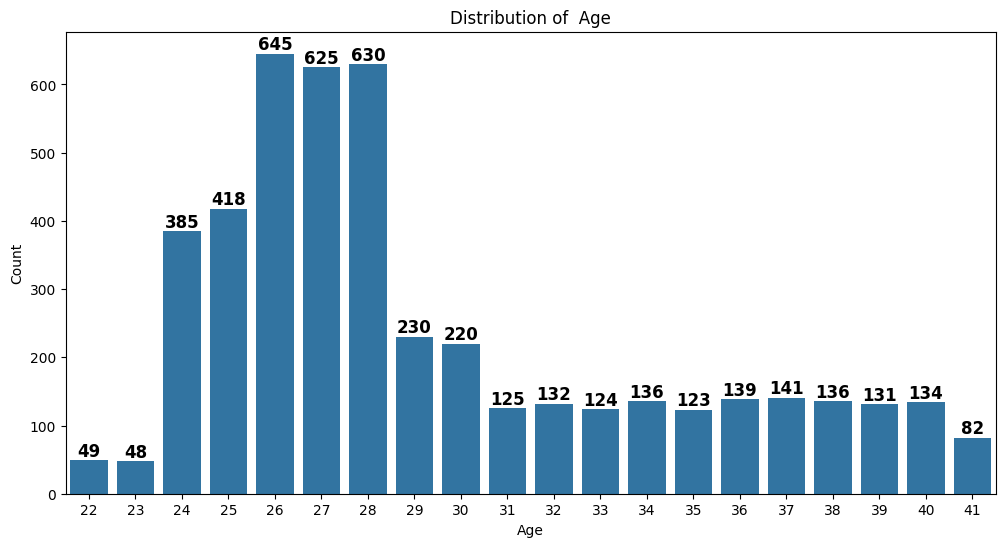

In [16]:
# Distribution of Age with value labels
plt.figure(figsize=(12,6))
ax = sns.barplot(x=data['Age'].value_counts().index, y=data['Age'].value_counts())


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Distribution of  Age')
plt.ylabel('Count')
plt.xlabel('Age')
plt.show()

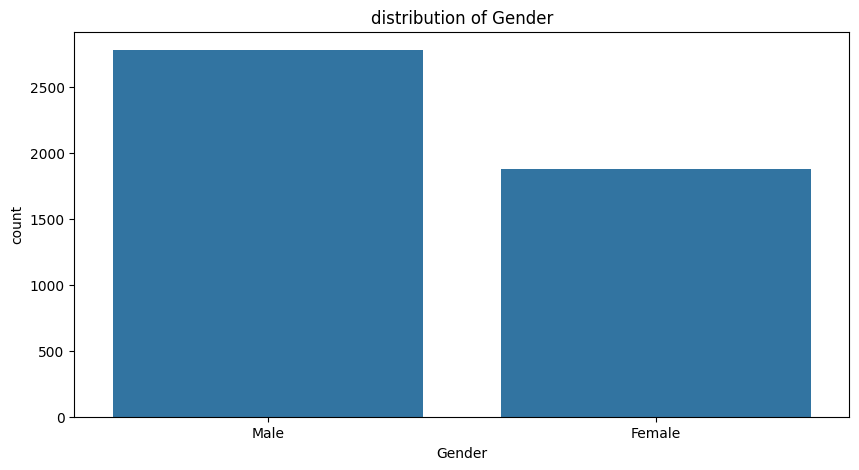

In [17]:
#distrbution of gender
plt.figure(figsize=(10,5))
sns.barplot(x=data['Gender'].value_counts().index,y=data['Gender'].value_counts())
plt.title('distribution of Gender')
plt.ylabel('count')
plt.show()

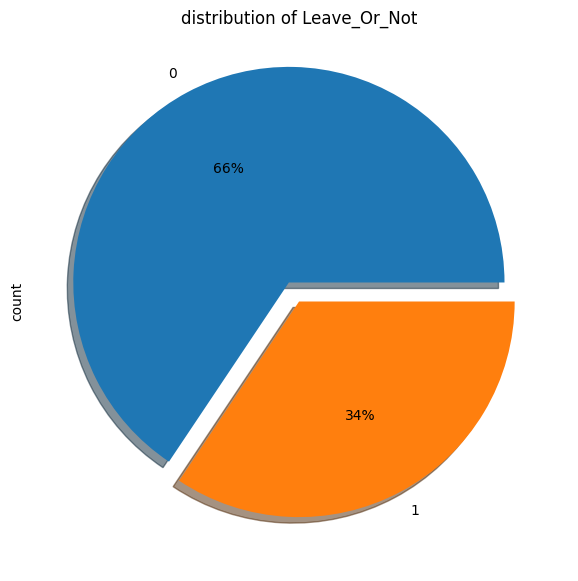

In [18]:
plt.figure(figsize=(9,7))
data['LeaveOrNot'].value_counts().plot(kind='pie',autopct='%0.0f%%',explode=(0.1,0),shadow=True)
plt.title('distribution of Leave_Or_Not')
plt.show()

<Axes: xlabel='City', ylabel='count'>

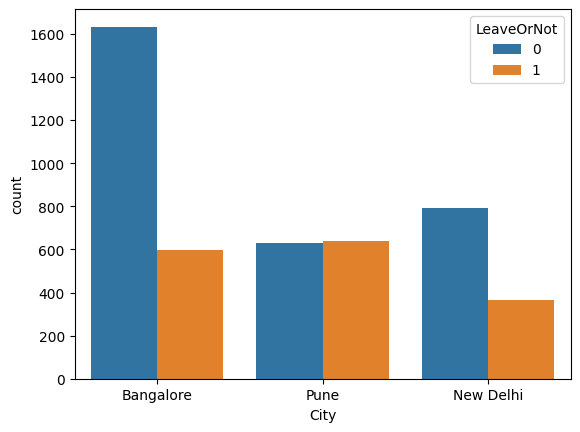

In [19]:
sns.countplot(data=data, x= data["City"], hue="LeaveOrNot")


> indicates that in Pune City half of the people leave their jobs, whereas the Banglore and New Delhi are the cities where people are willing to do the jobs.



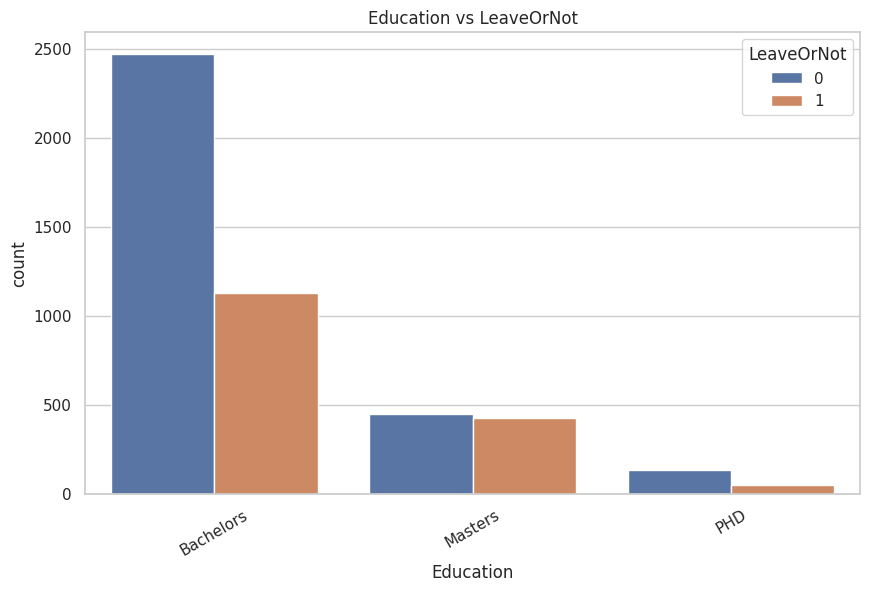

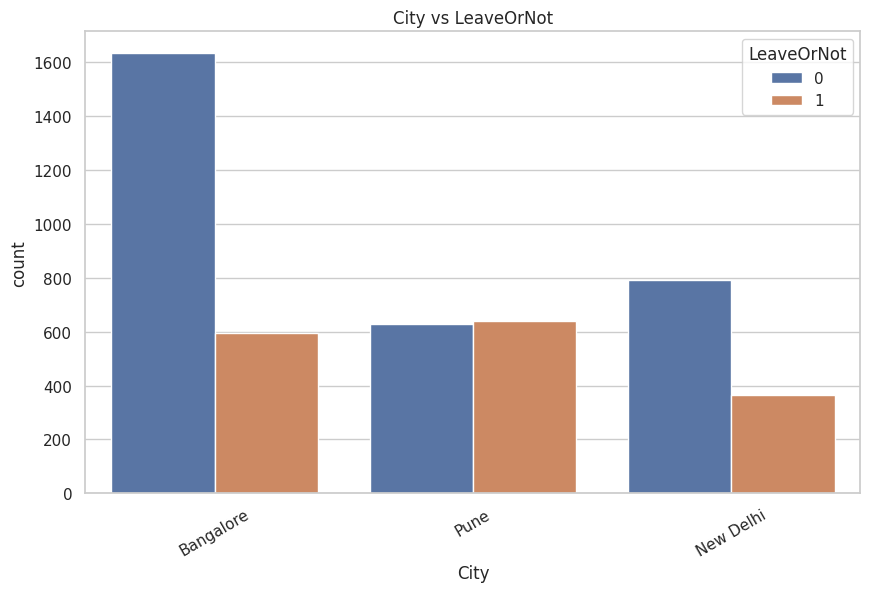

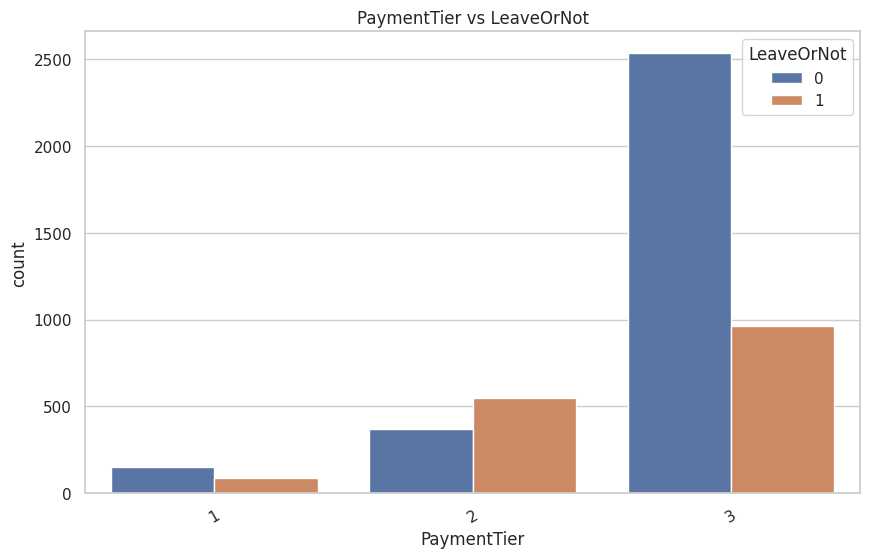

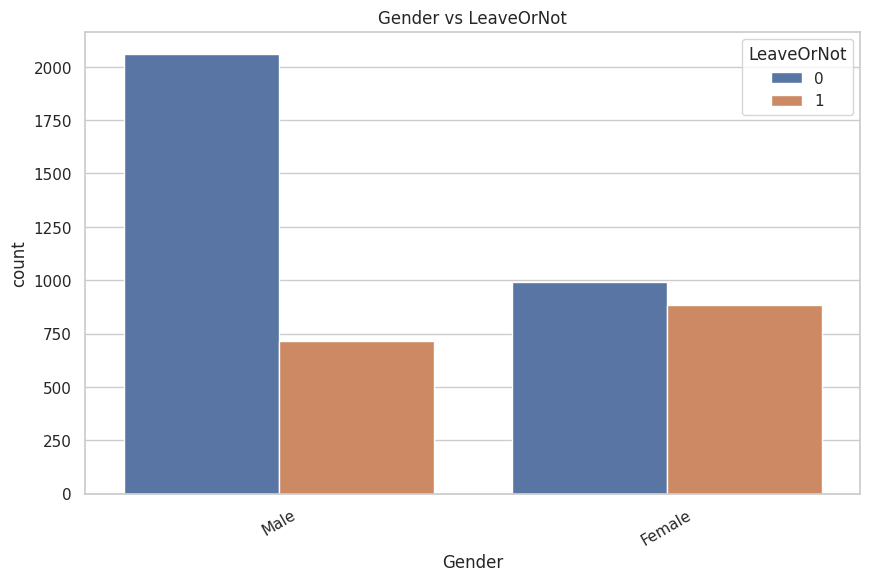

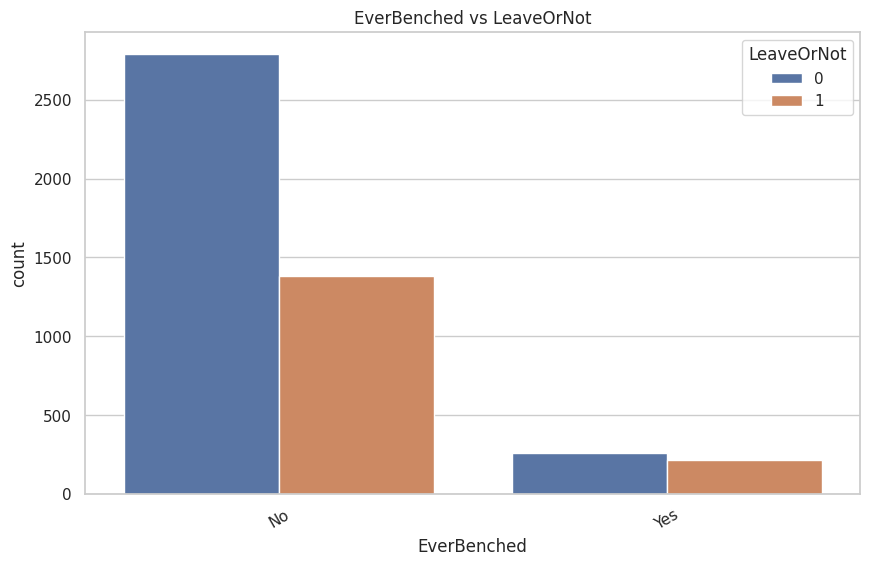

In [20]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
categorical_cols = ['Education', 'City', 'PaymentTier', 'Gender', 'EverBenched']

for col in categorical_cols:
    plt.figure()
    sns.countplot(x=col, hue='LeaveOrNot', data=data)
    plt.title(f'{col} vs LeaveOrNot')
    plt.xticks(rotation=30)
    plt.show()

# **Key Insight**
1. **Gender vs. LeaveOrNot**
* Male employees appear to have a higher attrition rate (LeaveOrNot = 1) compared to female employees.

* Retention efforts may need to address workplace factors (e.g., flexibility, bias) disproportionately affecting one gender.

2. **PaymentTier vs. LeaveOrNot**
* Employees in lower PaymentTiers (1 or 2) are more likely to leave  than those in higher tiers (3 or 4), highlighting compensation as a critical retention lever.

* The gap between tiers suggests salary adjustments or benefits could reduce attrition in lower tiers.

3. **City vs. LeaveOrNot**
* Bangalore shows the highest attrition (LeaveOrNot = 1), possibly due to competitive job markets or cost-of-living pressures, while Pune/New Delhi are more stable.

* Location-specific strategies (e.g., remote work, local perks) may help mitigate attrition in high-risk cities.

4. **Education vs. LeaveOrNot**
* Employees with Bachelors’ degrees have the highest attrition rate, while those with Masters/PhD are more likely to stay, possibly due to career growth opportunities.

* Upskilling programs or role-specific advancement paths could improve retention for less-educated employees.

5. **EverBenched vs. LeaveOrNot**
* Employees who were benched (idle) at any point (EverBenched = Yes) are significantly more likely to leave, indicating disengagement due to underutilization.

* Proactive project allocation or skill-development during bench periods may reduce attrition.

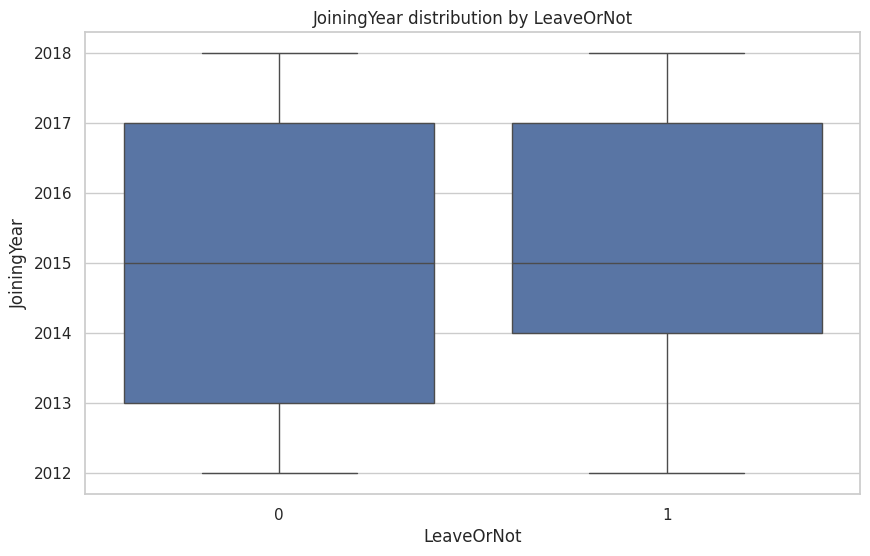

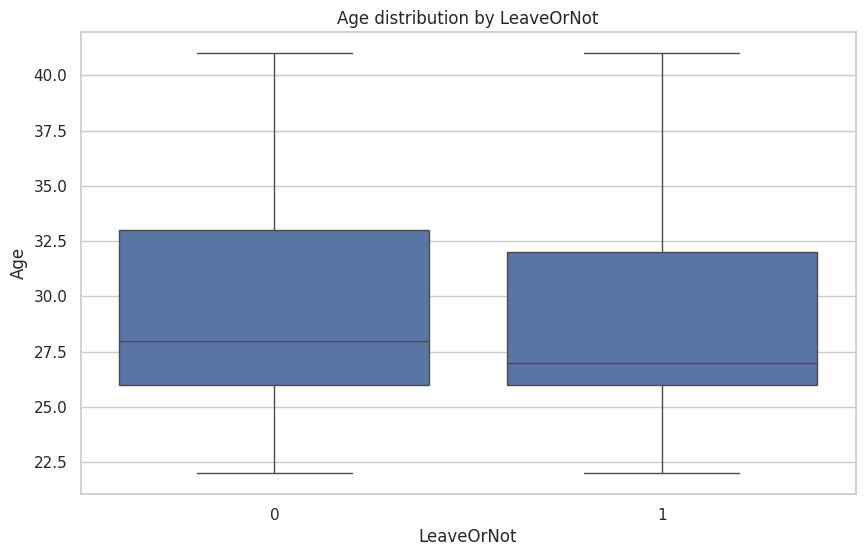

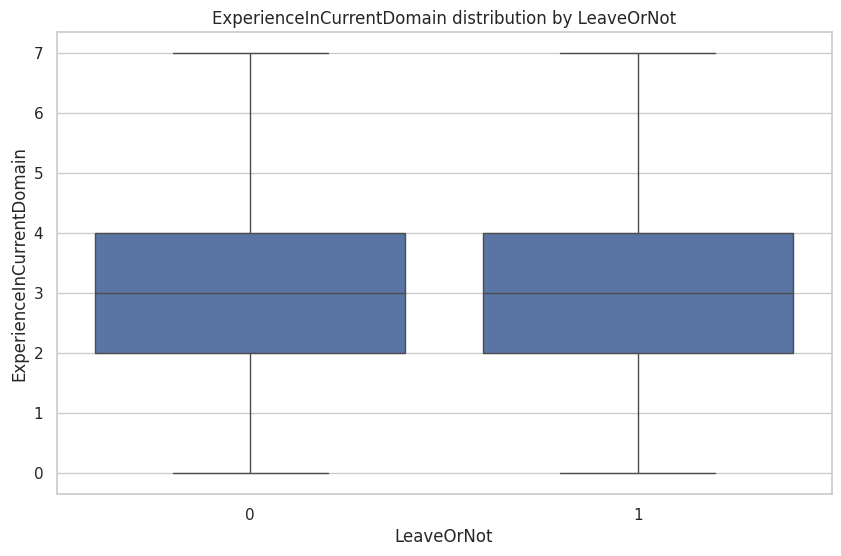

In [21]:
numerical_cols = ['JoiningYear', 'Age', 'ExperienceInCurrentDomain']

for col in numerical_cols:
    plt.figure()
    sns.boxplot(x='LeaveOrNot', y=col, data=data)
    plt.title(f'{col} distribution by LeaveOrNot')
    plt.show()

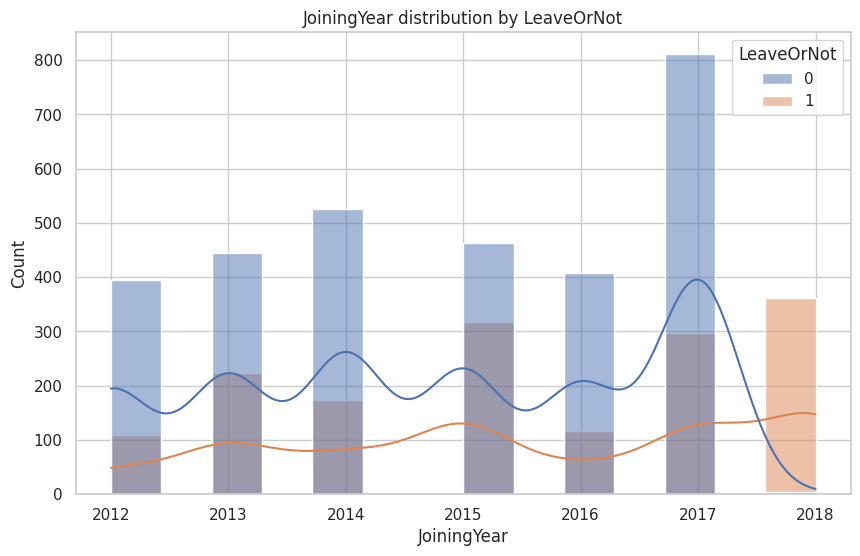

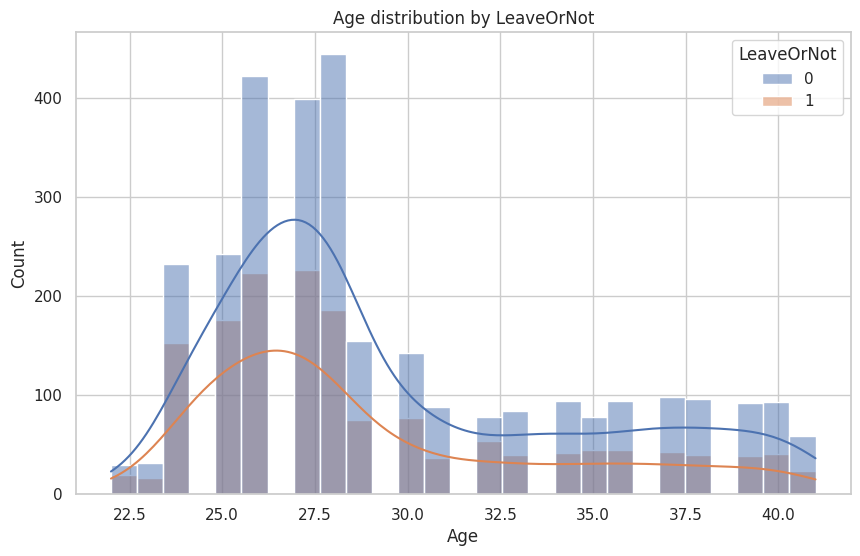

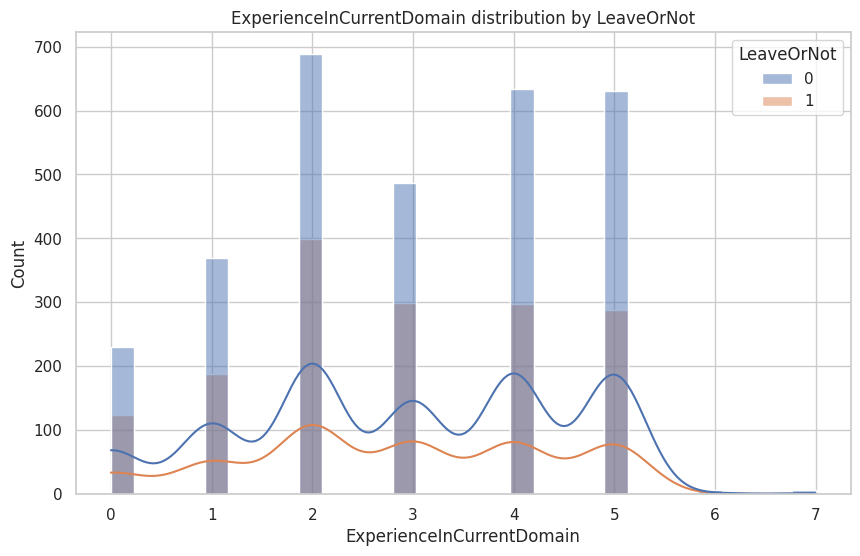

In [25]:
numerical_cols = ['JoiningYear', 'Age', 'ExperienceInCurrentDomain']

for col in numerical_cols:
    plt.figure()
    sns.histplot(data=data, x=col, hue='LeaveOrNot', kde=True)
    plt.title(f'{col} distribution by LeaveOrNot')
    plt.show()

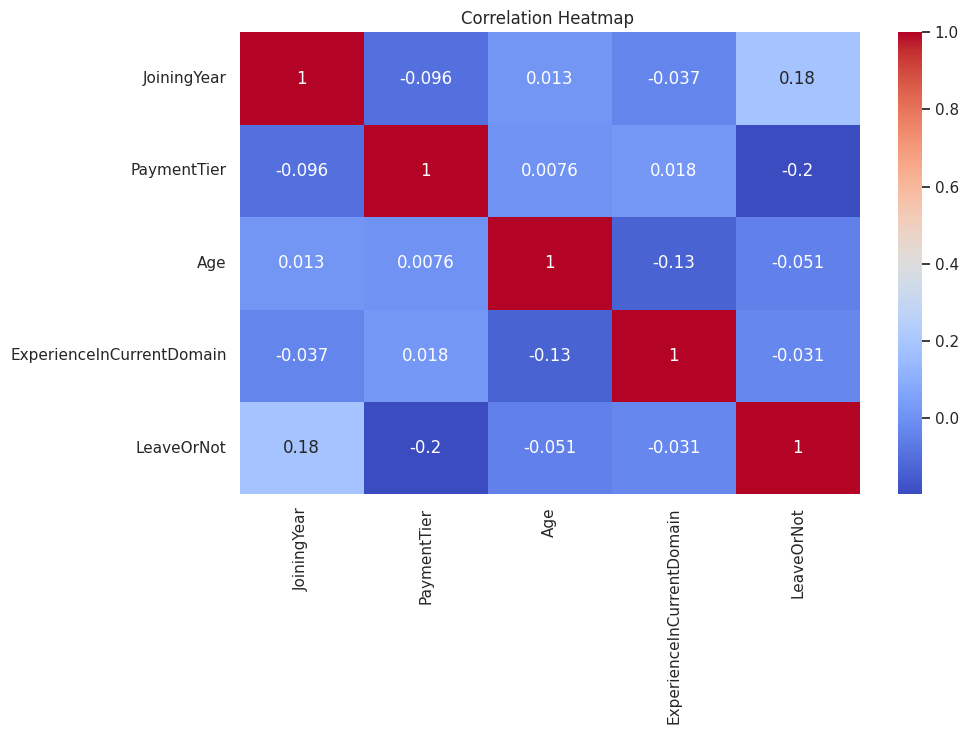

In [26]:
cm = data.corr(numeric_only=True)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap ')
plt.show()

In [27]:
label_encoders = {}

encoded_col = ['Education','City','Gender','EverBenched']

for col in encoded_col:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store encoder for future use

data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


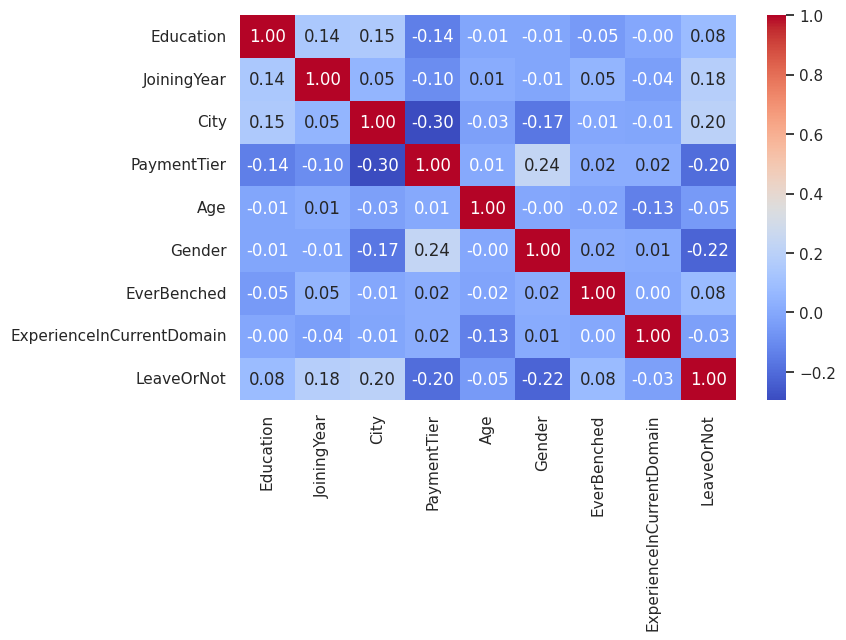

In [29]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

# **Split the Data into Train and Test Set**

In [30]:
data['LeaveOrNot'].value_counts()

,count
LeaveOrNot,
0,3053
1,1600


In [31]:
X=data.drop('LeaveOrNot',axis=1)
y=data['LeaveOrNot']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3722, 8), (3722,), (931, 8), (931,))

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
# balance the dataset using smote technique
sm= SMOTE(sampling_strategy="minority", random_state=42)
x_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)

In [42]:
models={
    "LogisticRegression":LogisticRegression(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "GaussianNB":GaussianNB(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
}

In [45]:
from tqdm import tqdm

from re import M
Model_name=[]
Model_Accuracy=[]
for name,model in tqdm(models.items()):
  model.fit(X_train,y_train)
  Model_name.append(name)
  y_pred=model.predict(X_test)
  Model_Accuracy.append([
      accuracy_score(y_test,y_pred),
      recall_score(y_test,y_pred),
      precision_score(y_test,y_pred),
      f1_score(y_test,y_pred)]
  )
Model_Accuracy=pd.DataFrame(Model_Accuracy,columns=['Accuracy','Recall','Precision','F1_Score'],index=Model_name)
Model_Accuracy

100%|██████████| 5/5 [00:00<00:00,  8.57it/s]


,Accuracy,Recall,Precision,F1_Score
LogisticRegression,0.712137,0.342679,0.658683,0.450820
KNeighborsClassifier,0.795918,0.604361,0.754864,0.671280
GaussianNB,0.685285,0.454829,0.553030,0.499145
DecisionTreeClassifier,0.837809,0.725857,0.787162,0.755267
RandomForestClassifier,0.853921,0.725857,0.829181,0.774086


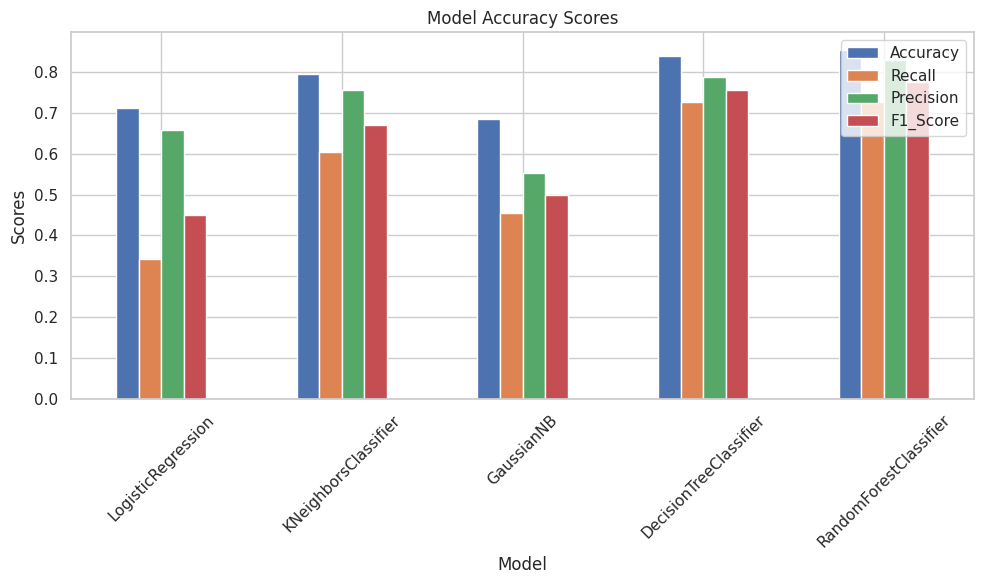

In [47]:
Model_Accuracy.plot(kind='bar', figsize=(10, 6))

# Customizing the plot
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45) # Rotate model names for better readability
plt.legend(loc='upper right')
plt.tight_layout() # Adjust layout to fit labels

# Display the plot
plt.show()